<a href="https://colab.research.google.com/github/juan-acuna18/IA_20242/blob/main/Parcial3_Avellandeda_Acu%C3%B1a_Oviedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.1. Algoritmos Geneticos**

## Importar Librerias

In [538]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

## Definir  función

In [539]:
def fx(x):
    return(math.sin(x)+math.cos((5*x)**0.5)+2)

## Generar vector de X

In [540]:
x = np.arange(0,20,0.01)
y = []

for i in x:
  y.append(fx(i))

Text(0.5, 1.0, 'Función Objetivo')

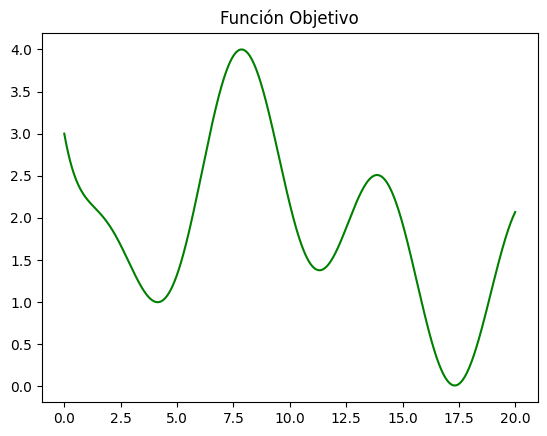

In [541]:
plt.plot(x,y, "g")
plt.title("Función Objetivo")

## Paso 1. Codificación de genotipo

In [542]:
def decToBinlist(num, length):
  binary_representation = bin(num)[2:]
  padding = length - len(binary_representation)
  if padding > 0:
    binary_representation = '0' * padding + binary_representation
  return [int(i) for i in binary_representation]

In [543]:
decToBinlist(5,5) #Convierte el 5 a binario con una longitud de 5 caracteres

[0, 0, 1, 0, 1]

In [544]:
def binlistTodec(binlist):
  return int(''.join(map(str, binlist)), 2)

In [545]:
binlistTodec([1,0,1]) #Convierte el binario a decimal

5

## Generar el cromosoma de cada individuo.

In [546]:
size_cromo = 5 #Tamaño del cromosoma en bits
cromosoma = [np.linspace(0,20,21)] # Rango del cromosoma de 0 a 20

individuo =[]
individuo += [decToBinlist(np.random.choice(cromosoma[0].astype(int)),size_cromo)]#Generar un individuo aleatorio
individuo

[[0, 0, 0, 0, 1]]

## Generar población del inidividuo.

In [547]:
size_poblacion = 6;
poblacion = []
for i in range(size_poblacion):
  poblacion.append(decToBinlist(np.random.choice(cromosoma[0].astype(int)),size_cromo))
poblacion

[[1, 0, 0, 0, 1],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 1, 0, 0],
 [0, 0, 0, 1, 1],
 [1, 0, 1, 0, 0]]

##Evaluar la poblacion

In [548]:
fitness = []

for individuo in poblacion:
  x_d = binlistTodec(individuo)
  y_d = fx(x_d)
  fitness += [y_d]

In [549]:
# Medición de aptitud de la población
fitness = np.array(fitness)
fitness = fitness/fitness.sum()
fitness

array([0.00667995, 0.21405659, 0.21405659, 0.17613542, 0.15658981,
       0.23248164])

##Seleccionar por medio del algoritmo de la ruleta.

In [550]:
# El más apto por función fitness
padre_1 = np.argmax(fitness)
# Seleccionando el alatorio por random pero con las probabilidades dadas por la función fitness
padre_2 = np.random.choice(size_poblacion, 1, p=fitness)
padres = [padre_1, padre_2[0]]
padres

[5, 1]

##Cruce

In [551]:

poblacion_temporal=[]
# Definir el punto de cruce aleatorio
cross_point = random.choice(range(0, size_cromo))
print("crosspoint:",cross_point)
numero_hijos = 1 # en cada iteracion me genera dos hijos
for i in range(numero_hijos):
  padres = np.argsort(fitness)[::-1][:2]
  poblacion_temporal += [poblacion[padres[0]][:cross_point]+poblacion[padres[1]][cross_point:]]
  poblacion_temporal += [poblacion[padres[1]][:cross_point]+poblacion[padres[0]][cross_point:]]
poblacion_temporal

crosspoint: 2


[[1, 0, 0, 1, 0], [0, 0, 1, 0, 0]]

## Mutacion

In [552]:
def mutate(poblacion_temporal, porcentaje_mutacion, cromosoma):
    poblacion_mutada = []
    for individuo in poblacion_temporal:
        individuo_mutado = []
        for gen in individuo:
            if random.random() < porcentaje_mutacion:
                # Invertir el bit (mutación)
                individuo_mutado.append(1 - gen)
            else:
                individuo_mutado.append(gen)
        poblacion_mutada.append(individuo_mutado)
    return poblacion_mutada

In [553]:
nuevos_hijos = mutate(poblacion_temporal, 0.12, cromosoma)
print("Población mutada:")
for individuo in nuevos_hijos:
    print(individuo)

for i in range(len(padres)):
    poblacion[padres[i]] = nuevos_hijos[i]

print("Población actualizada:")
for individuo in poblacion:
    print(individuo)



Población mutada:
[1, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
Población actualizada:
[1, 0, 0, 0, 1]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
[0, 1, 1, 0, 0]
[0, 0, 0, 1, 1]
[1, 0, 0, 1, 0]


In [554]:
nuevos_hijos = mutate(poblacion_temporal, 0.12, None)
print("Población mutada:")
for individuo in nuevos_hijos:
    print(individuo)

# Identificar los índices de los individuos con peor aptitud
peores_indices = np.argsort(fitness)[:len(nuevos_hijos)]
print("Índices de los peores individuos:", peores_indices)

# Reemplazar los peores individuos con los nuevos hijos
for i in range(len(nuevos_hijos)):
    poblacion[peores_indices[i]] = nuevos_hijos[i]

print("Población actualizada:")
for individuo in poblacion:
    print(individuo)

Población mutada:
[1, 1, 0, 1, 0]
[0, 0, 1, 0, 0]
Índices de los peores individuos: [0 4]
Población actualizada:
[1, 1, 0, 1, 0]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
[0, 1, 1, 0, 0]
[0, 0, 1, 0, 0]
[1, 0, 0, 1, 0]


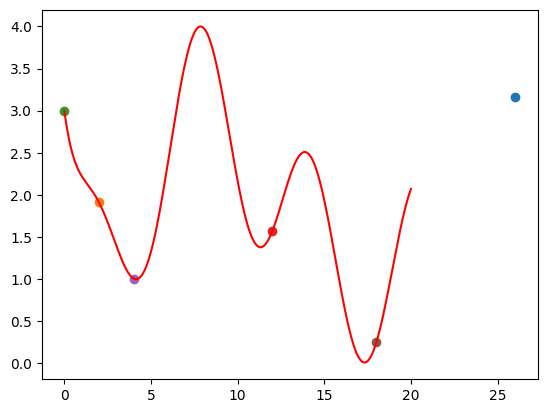

In [555]:
for individuo in poblacion:
  x_d = binlistTodec(individuo)
  y_d = fx(x_d)
  plt.plot(x_d,y_d,'o')

plt.plot(x,y,'r')

##Algortimi Genetico Completo

In [556]:
size_poblacion = 6;
poblacion = []
for i in range(size_poblacion):
  poblacion.append(decToBinlist(np.random.choice(cromosoma[0].astype(int)),size_cromo))
poblacion

[[0, 0, 0, 1, 1],
 [0, 0, 1, 1, 0],
 [0, 1, 1, 0, 0],
 [0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0]]

In [557]:
generaciones = 1000;
for i in range(generaciones):
  # Evaluación de aptitud
  fitness = []
  for individuo in poblacion:
    x_d = binlistTodec(individuo)
    y_d = fx(x_d)
    fitness += [y_d]
  fitness = np.array(fitness)
  fitness = fitness/fitness.sum()
  ##Seleccion de Padres
  # El más apto por función fitness
  padre_1 = np.argmax(fitness)
  # Seleccionando el alatorio por random pero con las probabilidades dadas por la función fitness
  padre_2 = np.random.choice(size_poblacion, 1, p=fitness)
  padres = [padre_1, padre_2[0]]

  ##Cruce
  poblacion_temporal=[]
  # Definir el punto de cruce aleatorio
  cross_point = random.choice(range(0, size_cromo))
  #print("crosspoint:",cross_point)
  numero_hijos = 1 # en cada iteracion me genera dos hijos
  for i in range(numero_hijos):
    padres = np.argsort(fitness)[::-1][:2]
    poblacion_temporal += [poblacion[padres[0]][:cross_point]+poblacion[padres[1]][cross_point:]]
    poblacion_temporal += [poblacion[padres[1]][:cross_point]+poblacion[padres[0]][cross_point:]]
  ##Mutacion
  nuevos_hijos = mutate(poblacion_temporal, 0.15, cromosoma)
  #remplazo
  for i in range(len(padres)):
    poblacion[padres[i]] = nuevos_hijos[i]
  #print("Población actualizada:")


In [558]:
print(poblacion)

[[1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0]]


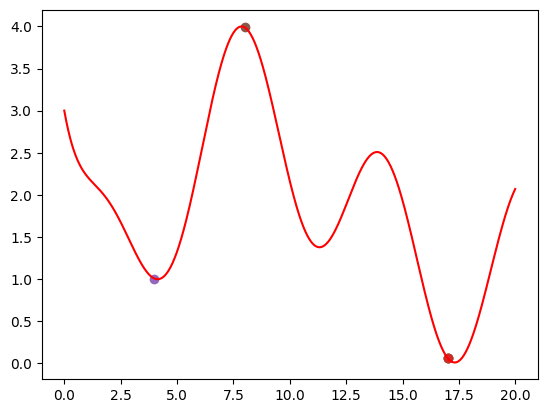

In [559]:
for individuo in poblacion:
  x_d = binlistTodec(individuo)
  y_d = fx(x_d)
  plt.plot(x_d,y_d,'o')

plt.plot(x,y,'r')

#**FUZZY**

# **2.1. Instalando librerias**

In [560]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# **2. DEFINIR ENTRADAS**

**VARIABLES LINGUISTICAS DE ENTRADAS**                          
DIFERENCIA DE TEMPERATURA

Large Negative:(-20,1.0)(-15.0,1.0)(-10.0,0.0)             
Small negative: (-15.0,1.0)(-10.0,0.0)(-5.0,0.0)                     
Zero :(-10.0,0.0)(-5.0,0.0)(+5.0,0.0)(+10.0,0.0)                           
Small positive:(+5.0,0.0)(+10.0,0.0)(+15.0,0.0)                             
Large positive:(+10.0,0.0)(+15.0,0.0)(+20.0,0.0)                       

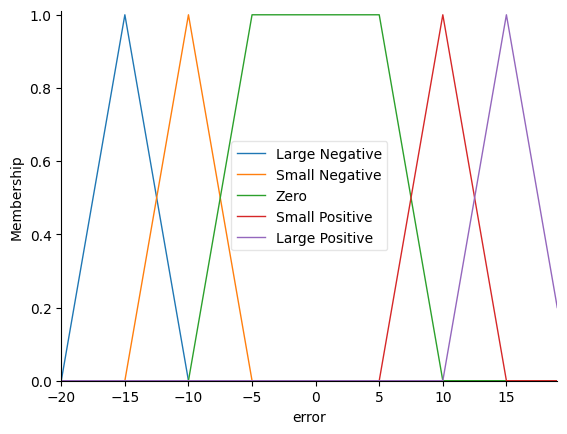

In [561]:
error = ctrl.Antecedent(np.arange(-20, 20, 1), 'error')
error['Large Negative'] = fuzz.trimf(error.universe,[-20,-15,-10])
error['Small Negative'] = fuzz.trimf(error.universe,[-15,-10,-5])
error['Zero'] = fuzz.trapmf(error.universe,[-10,-5,5,10])
error['Small Positive'] = fuzz.trimf(error.universe,[5,10,15])
error['Large Positive'] = fuzz.trimf(error.universe,[10,15,20])
error.view()

# **3. DEFINIR SALIDAS**

**VARIABLES DE SALIDA**                              
Cambio Fraccional de la Válvula f (cambio en la posición de la válvula (fracción de apertura)

-
Si la fracción 𝑓 es mayor que cero el rango se define como totalmente abierta (1.0) menos la posición
actual de la válvula.  
Si la fracción 𝑓 es menor que cero el rango se define como la posición actual de la válvula.  

Large Negative:(-1.5,-1.0,-0.5)             
Small negative: (-1.0,-0.5,0.0)                     
Zero :(-0.5,0.0,0.5)                           
Small positive:(0.0,0.5,1.0)                            
Large positive:(0.5,1.0,1.5)





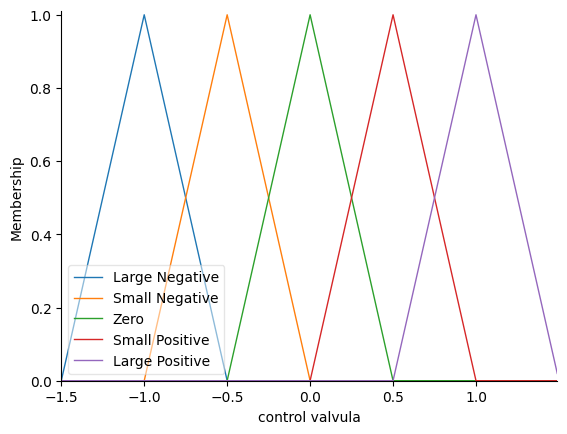

In [562]:

valvula = ctrl.Consequent(np.arange(-1.5,1.5,0.01), 'control valvula')
valvula['Large Negative'] = fuzz.trimf(valvula.universe,[-1.5,-1.0,-0.5])
valvula['Small Negative'] = fuzz.trimf(valvula.universe,[-1.0,-0.5,0.0])
valvula['Zero'] = fuzz.trimf(valvula.universe,[-0.5,0.0,0.5])
valvula['Small Positive'] = fuzz.trimf(valvula.universe,[0.0,0.5,1.0])
valvula['Large Positive'] = fuzz.trimf(valvula.universe,[0.5,1.0,1.5])
valvula.view()

# **4. INFERENCIA**

In [563]:
# 3. Establecer las reglas difusas con base en el "error"
rule1 = ctrl.Rule(error['Large Positive'], valvula['Large Positive'])  # Error positivo grande -> Válvula completamente abierta
rule2 = ctrl.Rule(error['Small Positive'], valvula['Small Positive'])  # Error positivo pequeño -> Válvula parcialmente abierta
rule3 = ctrl.Rule(error['Zero'], valvula['Zero'])                      # Error cero -> Válvula en posición neutral
rule4 = ctrl.Rule(error['Small Negative'], valvula['Small Negative'])  # Error negativo pequeño -> Válvula parcialmente cerrada
rule5 = ctrl.Rule(error['Large Negative'], valvula['Large Negative'])  # Error negativo grande -> Válvula completamente cerrada


In [564]:
control_sys = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5]) #sistema
control_sim = ctrl.ControlSystemSimulation(control_sys) # simulador

# **5. Evaluar/Simular en un punto**


In [575]:
temperatura=125

def calcular_posicion_valvula(temperatura):
    diferencia_temp = temperatura - 110 # Calcular la diferencia de temperatura (∆T)

# Ingresar la diferencia de temperatura en el simulador
    control_sim.input['error'] =  diferencia_temp
    control_sim.compute()
    posicion_valvula = control_sim.output['control valvula']
    return posicion_valvula


In [576]:
#Posicion asumiento esta en 0
posicion_valvula = calcular_posicion_valvula(temperatura)
print(posicion_valvula)

0.9999013135960526


Salida defuzzificada = 0.9999013135960526
Salida defuzzificada redondeada = 1.0


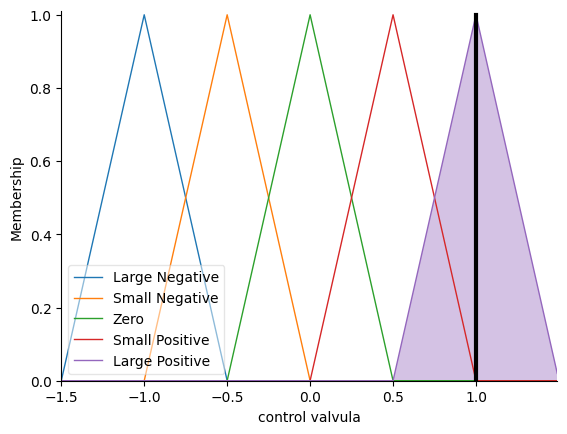

In [577]:
# Visualizacion de la salida igualada al f
valvula.view(sim=control_sim)
print("Salida defuzzificada =", posicion_valvula)
print("Salida defuzzificada redondeada =", round(posicion_valvula, 2))

In [568]:
error_values = np.linspace(-20,20,401)
out = np.zeros_like(error_values)
n = error_values.size
n

401

In [578]:
for i in range(n):
  control_sim.input['error'] = error_values[i]
  control_sim.compute()
  out[i] = control_sim.output['control valvula']

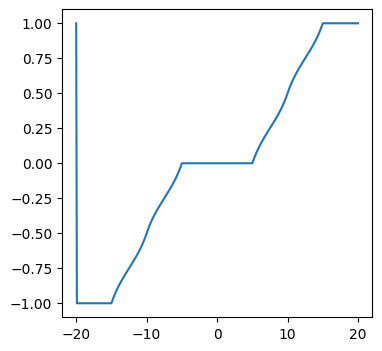

In [579]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,4))
plt.plot(error_values,out)




# **6.PREGUNTAS**

N𝑢𝑒𝑣𝑎 𝑝𝑜𝑠𝑖𝑐𝑖ó𝑛 𝑑𝑒 𝑙𝑎 𝑣𝑎𝑙𝑣𝑢𝑙𝑎 = 𝑃𝑜𝑠𝑖𝑐𝑖ó𝑛 𝑎𝑛𝑡𝑒𝑟𝑖𝑜𝑟 𝑑𝑒 𝑙𝑎 𝑣𝑎𝑙𝑣𝑢𝑙𝑎 +𝑓 ∗ 𝑟𝑎𝑛𝑔𝑜


### 1. Si el fluido caliente repentinamente incrementa su temperatura a 113°F, ¿Cuál es la nueva posición de la válvula recomendada por el controlador?

delta= 5
Salida defuzzificada = -2.783689077856533e-17
Salida defuzzificada  redondeada= -0.0
nueva posicion= 0.6


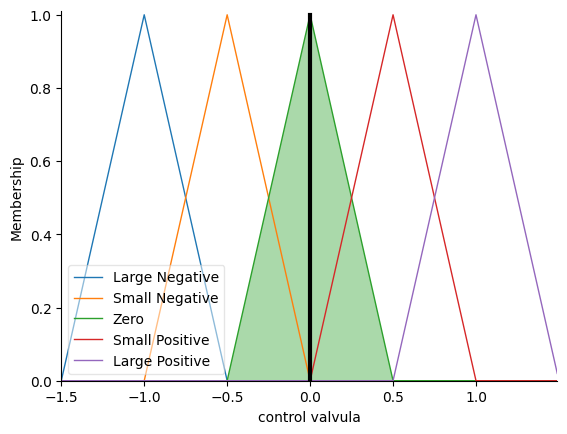

In [584]:
posicion_valvula = 0.6 # Posición inicial de la válvula

Temp_set=110
Temp_now=115

delta=Temp_now-Temp_set
print("delta=",delta)

control_sim.input['error'] = delta
control_sim.compute()
valvula.view(sim=control_sim)
print("Salida defuzzificada =", control_sim.output['control valvula'])
print("Salida defuzzificada  redondeada=", round(control_sim.output['control valvula'],2))

#nueva posicion
if control_sim.output['control valvula'] > 0:
    rango=1
else:
   rango=posicion_valvula

nueva_posicion = posicion_valvula + control_sim.output['control valvula']*rango
print("nueva posicion=",nueva_posicion)
